# Iterrows Perfomance


In [6]:
from pathlib import Path
import csv
import time

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns


from sklearn.base import TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator
from sklearn.model_selection import StratifiedShuffleSplit

%matplotlib inline

In [2]:
data_path = Path().resolve().parent / 'data' / 'housing'
data_file = data_path / 'housing.csv'
print(f'Path: {data_path} exists: {data_path.exists()}')

Path: /home/luiscberrocal/PycharmProjects/ml_hands_on/data/housing exists: True


## Load data

In [3]:
df = pd.read_csv(data_file)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
%%time
for idx, row in df.iterrows():
    temp = row['longitude'] + row['latitude']

CPU times: user 667 ms, sys: 2.86 ms, total: 670 ms
Wall time: 669 ms


In [6]:
%%time
for row in df.itertuples():
    temp = row.longitude + row.latitude

CPU times: user 22.8 ms, sys: 3.94 ms, total: 26.7 ms
Wall time: 25.8 ms


In [14]:
%%time
for row in df.to_dict('records'):
    #print(row)
    temp = row['longitude'] + row['latitude']

CPU times: user 87.9 ms, sys: 1.88 ms, total: 89.8 ms
Wall time: 89.5 ms


In [19]:
%%time
with open(data_file, 'r') as csv_file:
    reader = csv.reader(csv_file)
    next(reader)
    for row in reader:
        temp = float(row[0])+ float(row[1])

CPU times: user 27.2 ms, sys: 5.15 ms, total: 32.3 ms
Wall time: 27.7 ms


## Random dataframe generation

In [10]:
res_dict = dict()
max_rows = 100_000
steps = 1000
start_row = 1000


In [11]:
%%time
rows = list()
iter_rows_list = list()
iter_tuples_list = list()
iter_to_dict_list = list()

for row_count in tqdm(range(start_row, max_rows, steps)):
    rows.append(row_count)
    df = pd.DataFrame(np.random.randint(0,100,size=(row_count, 4)), columns=list('ABCD'))
    
    elapsed_values = list()
    start = time.time()
    for idx, row in df.iterrows():
        temp = row['A'] + row['B']
    elapsed = (time.time() - start) *1000
    iter_rows_list.append(elapsed)
    #print(f'Iterrows Rows: {row_count} elapsed {elapsed:.2f} ms')
    
    
    start = time.time()
    for row in df.itertuples():
        temp = row.A + row.B
    elapsed = (time.time() - start) *1000
    iter_tuples_list.append(elapsed)
    
    start = time.time()
    for row in df.to_dict('records'):
        temp = row['A'] + row['B']
    elapsed = (time.time() - start) *1000
    iter_to_dict_list.append(elapsed)
    
    

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [02:33<00:00,  1.55s/it]

CPU times: user 2min 33s, sys: 58.8 ms, total: 2min 33s
Wall time: 2min 33s


In [12]:
res_data = {'Iter rows': iter_rows_list, 'Iter tuples': iter_tuples_list, 'To dict': iter_to_dict_list}
res_df = pd.DataFrame(res_data, index=rows)

res_df.head()

,Iter rows,Iter tuples,To dict
1000,39.988756,1.010418,2.405643
2000,64.108372,1.355410,3.903151
3000,90.145588,1.921177,5.541086
4000,108.044863,2.038717,7.152796
5000,146.928310,3.029108,9.845972


In [13]:
res_df.describe()

,Iter rows,Iter tuples,To dict
count,99.000000,99.000000,99.000000
mean,1426.510835,27.508748,98.098880
std,828.715814,16.151013,57.147144
min,39.988756,1.010418,2.405643
25%,701.376200,14.002681,50.390005
50%,1417.747498,26.578665,98.043442
75%,2187.213540,41.123271,149.009228
max,2809.220076,59.531450,209.372044


<AxesSubplot:title={'center':'Iteration performance'}, xlabel='Record count', ylabel='Elapsed time iterating (ms)'>

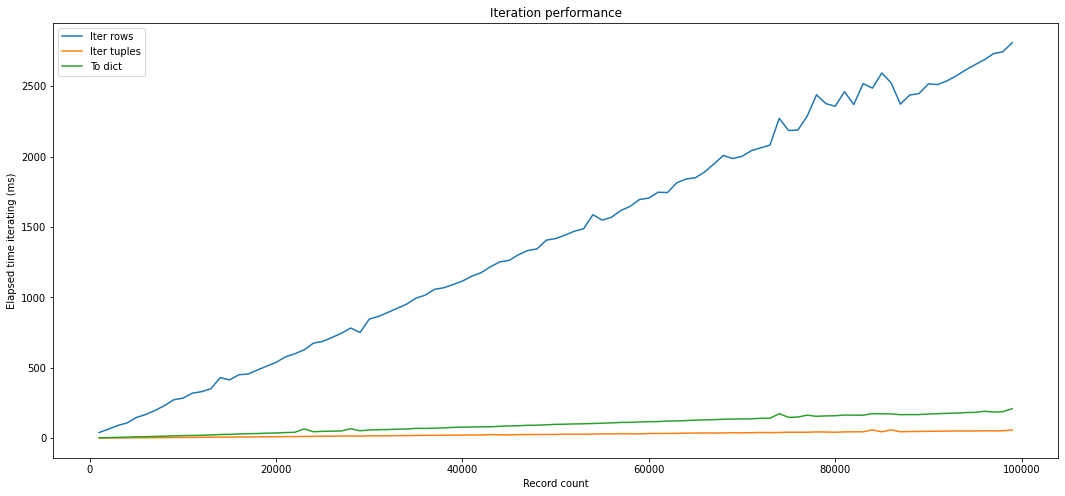

In [25]:
# ax = plt.gca()

res_df.plot.line(title='Iteration performance', xlabel='Record count',
                 ylabel='Elapsed time iterating (ms)', figsize=(18,8))


## Hashing algorithms


In [25]:
import hashlib

In [31]:
line = 'k' * 900
number_of_iterations = 100_000

In [32]:
%time
for i in tqdm(range(number_of_iterations)):
    hash1 = hashlib.sha1(line.encode('utf-8'))
    if i == 0:
        digest = hash1.hexdigest()
        print(f'Digest: {digest} ({len(digest)})')

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs


100%|███████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 674726.77it/s]

Digest: e772308362251a79357604a4a872ee09c40c2466 (40)


In [33]:
%time
for i in tqdm(range(number_of_iterations)):
    hash1 = hashlib.sha256(line.encode('utf-8'))
    if i == 0:
        digest = hash1.hexdigest()
        print(f'Digest: {digest} ({len(digest)})')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


  0%|                                                                                                            | 0/100000 [00:00<?, ?it/s]

Digest: a17c16c3bf2c31e6ef487b1a68eddf460d74edbe12ce7f5ca296fd6f6736e3b1 (64)


100%|███████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 375531.18it/s]


In [34]:
%time
for i in tqdm(range(number_of_iterations)):
    hash1 = hashlib.sha3_256(line.encode('utf-8'))
    if i == 0:
        digest = hash1.hexdigest()
        print(f'Digest: {digest} ({len(digest)})')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


 35%|████████████████████████████████▏                                                           | 34967/100000 [00:00<00:00, 349646.16it/s]

Digest: c392218c7a7d197f32405d5f6ff5fed7e65142a61ec8b9960ecd89d6a5f63927 (64)


100%|███████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 347271.25it/s]


In [35]:
%time
for i in tqdm(range(number_of_iterations)):
    hash1 = hashlib.sha3_384(line.encode('utf-8'))
    if i == 0:
        digest = hash1.hexdigest()
        print(f'Digest: {digest} ({len(digest)})')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


 27%|█████████████████████████▏                                                                  | 27328/100000 [00:00<00:00, 273261.37it/s]

Digest: 1ba467b185cb6df9ed459e45dec82e07dc049e1212a0d9c738232a009bb44fb43a1c156243ec404d0afb153479ccc51f (96)


100%|███████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 288871.67it/s]
